In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
data=pd.read_excel('Data_Train.xlsx')
data.head(10)

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3
5,BEIJING: Chinese tech giant Huawei has announc...,1
6,Mumbai: India Inc's external commercial borrow...,3
7,"On Wednesday, Federal Reserve Chairman Jerome ...",3
8,What more can you give to the audience? I have...,2
9,"com, Arbaaz Khan spoke about getting back to D...",2


In [5]:
print(data.dtypes)

STORY      object
SECTION     int64
dtype: object


In [6]:
print(data.shape)

(7628, 2)


In [8]:
print(data.describe())

           SECTION
count  7628.000000
mean      1.357892
std       0.999341
min       0.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       3.000000


In [9]:
print(data.isnull().sum())

STORY      0
SECTION    0
dtype: int64


In [10]:
print(data.isna().sum())

STORY      0
SECTION    0
dtype: int64


In [11]:
import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['STORY'] = data['STORY'].apply(punctuation_removal)
data.head()

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,If you want to answer any question click on ‘A...,1
4,In global markets gold prices edged up today a...,3


In [12]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['STORY'] = data['STORY'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Omprakash\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [14]:
def change(x):
    di={0:"politics",1:"technology",2:"entertainment",3:"business"}
    return di[x]

In [15]:
data['SECTION']=data['SECTION'].apply(change)

SECTION
business         1246
entertainment    1924
politics         1686
technology       2772
Name: STORY, dtype: int64


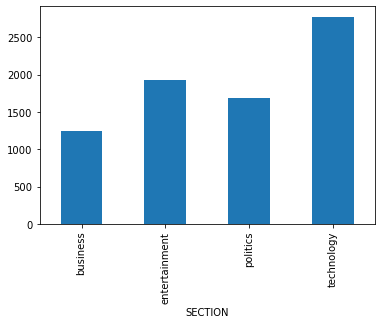

In [16]:
print(data.groupby(['SECTION'])['STORY'].count())
data.groupby(['SECTION'])['STORY'].count().plot(kind="bar")
plt.show()

In [17]:
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

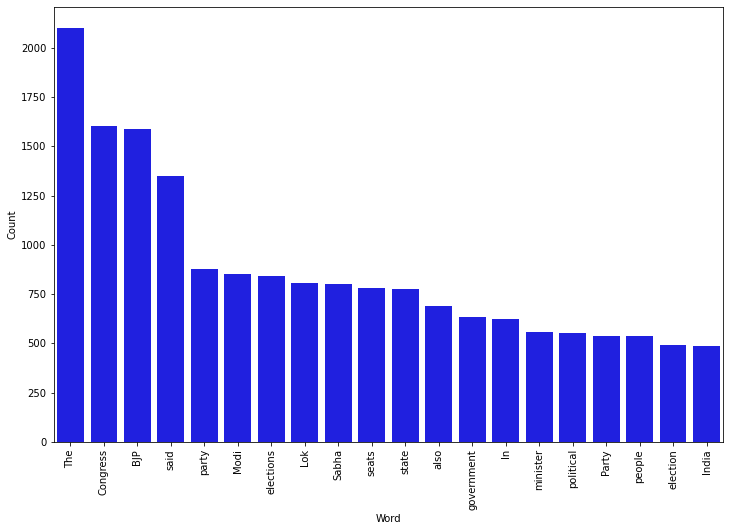

In [19]:
counter(data[data["SECTION"] == "politics"], "STORY", 20)

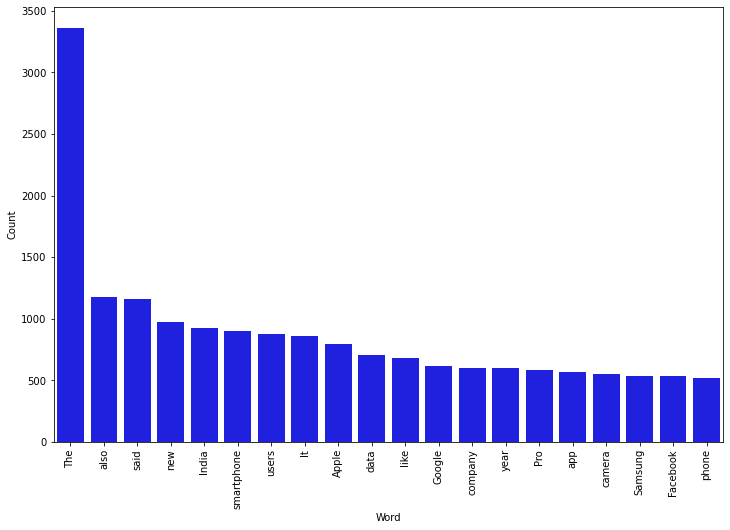

In [20]:
counter(data[data["SECTION"] == "technology"], "STORY", 20)

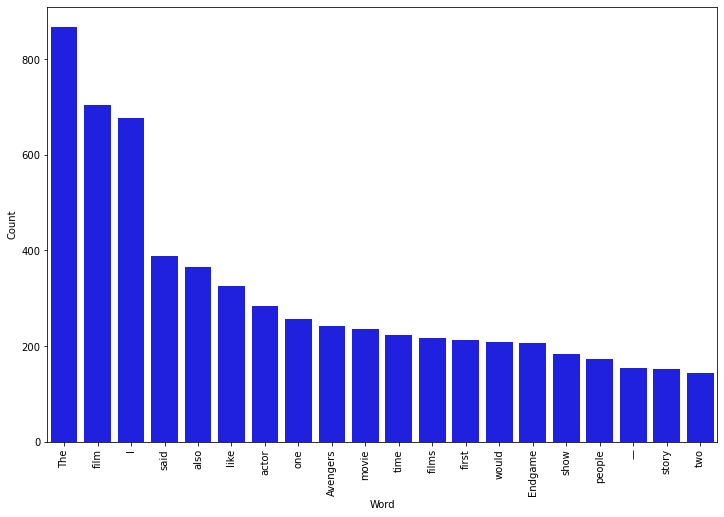

In [21]:
counter(data[data["SECTION"] == "entertainment"], "STORY", 20)

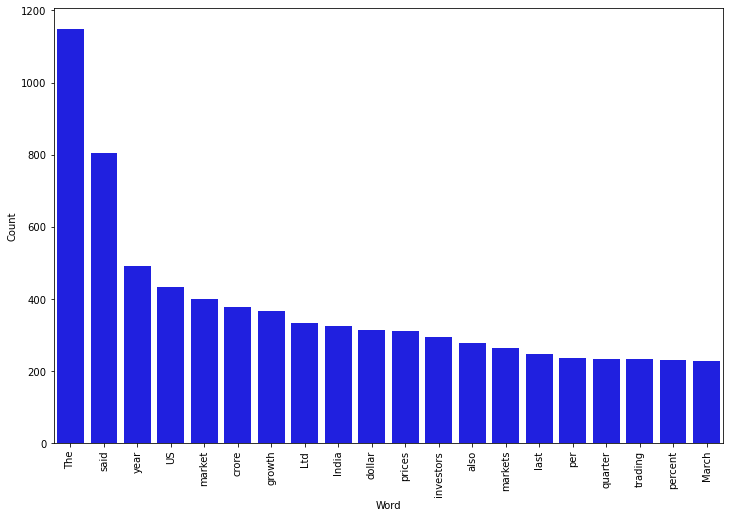

In [22]:
counter(data[data["SECTION"] == "business"], "STORY", 20)

In [23]:
def changelabel(x):
    di={"politics":0,"technology":1,"entertainment":2,"business":3}
    return di[x]

In [24]:
data['SECTION']=data['SECTION'].apply(changelabel)

In [25]:
data.head(10)

,STORY,SECTION
0,But painful huge reversal fee income unheard a...,3
1,How formidable opposition alliance among Congr...,0
2,Most Asian currencies trading lower today Sout...,3
3,If want answer question click ‘Answer’ After c...,1
4,In global markets gold prices edged today disa...,3
5,BEIJING Chinese tech giant Huawei announced pl...,1
6,Mumbai India Incs external commercial borrowin...,3
7,On Wednesday Federal Reserve Chairman Jerome P...,3
8,What give audience I already done Yeh Hai Aash...,2
9,com Arbaaz Khan spoke getting back Dabangg Sal...,2


In [28]:
x_train,x_test,y_train,y_test=train_test_split(data['STORY'], data['SECTION'], test_size=0.3, random_state=7)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [31]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')
df=pd.DataFrame(y_test)
df["ans"]=y_pred
df

Accuracy: 97.6%


,SECTION,ans
4875,1,1
788,3,3
1083,1,1
5240,3,3
6242,2,2
...,...,...
7385,2,2
1109,1,1
3470,3,3
3801,1,1


In [34]:
confusion_matrix(y_test,y_pred)

array([[469,  10,   8,   1],
       [  0, 834,   8,   4],
       [  7,   6, 544,   0],
       [  1,   7,   3, 387]], dtype=int64)